# Exclusive Plot

In [1]:
import pandas as pd

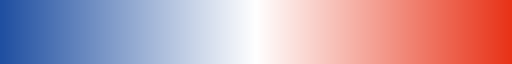

In [2]:
from types import new_class
from matplotlib.colors import LinearSegmentedColormap

colors = ['#1f4fa1', '#ffffff', '#e83217']
# colors = ['#ffffff', '#e83217']
n_bins = 256
new_cmap = LinearSegmentedColormap.from_list('custom_diverging', colors, N=n_bins)
new_cmap

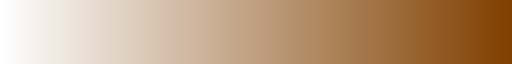

In [4]:
# 创建白色到绿色的cmap
colors_green = ['#ffffff', '#00ff00'] 
green_cmap = LinearSegmentedColormap.from_list('custom_green', colors_green, N=n_bins)

# 创建白色到红色的cmap
colors_red = ['#ffffff', '#ff0000']
red_cmap = LinearSegmentedColormap.from_list('custom_red', colors_red, N=n_bins)

# 创建白色到红绿混合的cmap
colors_mix = ['#ffffff', '#804000']  # 混合红绿色
mix_cmap = LinearSegmentedColormap.from_list('custom_mix', colors_mix, N=n_bins)
mix_cmap

In [1]:
import scanpy as sc

# fdata = sc.read_h5ad('./RNA/spatial.combined.bin100.h5')
# fdata = sc.read_h5ad('./RNA/reclustered.h5')

In [50]:
from scipy.io import mmread
import pandas as pd
import numpy as np

# 使用mmread读取Matrix Market格式的文件
cnt_matrix = mmread('Matlas_counts.mtx')
obs_names = pd.read_csv('Matlas_cell_names.csv', header=0)
var_names = pd.read_csv('Matlas_gene_names.csv', header=0).set_index('x')
umap_coordinates = pd.read_csv('Matlas_umap_coordinates.csv', header=0, index_col=0).to_numpy()
obs_df = pd.read_csv('Matlas_meta_data.csv', index_col=0)

fdata = sc.AnnData(X=cnt_matrix.T.toarray(), obs=obs_df, var=var_names, obsm={'spatial': umap_coordinates})
fdata

AnnData object with n_obs × n_vars = 16803 × 27231
    obs: 'Sample', 'Barcode', 'nCount_RNA', 'nFeature_RNA', 'percent.ribo', 'percent.mito', 'Study', 'functional.cluster', 'TILPRED', 'cycling.score', 'cellCycle.G1S', 'cellCycle.G2M', 'HeatShock', 'IfnResp', 'Tcell.stemness', 'Tcell.cytotoxicity', 'Tcell.exhaustion', 'module11', 'module21', 'module31'
    obsm: 'spatial'

In [47]:
module_1 = ["Slc44a2", "Ccnd2", "Ywhaq", "Ywhaq-ps3", "Sla2", "Dusp2", "Gpr171", "Sh2d1a", "Tsc22d3", "Txnip", "Klf6", "Itga4", "Dok2", "Rhoh", "Dcaf7", "Ogdh", "Gimap3", "Gimap5", "Pycard", "Cd2bp2", "Uqcr10", "Map4", "Ctsc", "Ndufa11", "Ndufa11b", "Cd96", "Ptpn7", "Prf1", "Zfp395", "Tpi1", "Lag3", "Samsn1", "S100a4", "Anxa5", "Pgam1", "Cd27", "Cblb", "Mmab", "Myo1g", "Wnk1", "Hmgb2", "Arhgap9", "Sash3", "Ikzf3", "Lpxn", "Pstpip1", "Id2", "Tnfrsf1b", "Ech1", "Klrk1", "Rgs1", "Rhox8", "Tox", "Calm1", "Calm2", "Calm3", "Gng5", "Gng5-ps", "Gng5c", "Ilk", "Surf4", "Heph", "Sepsecs", "Sla", "Limd2", "Gimap4", "Ctsw", "Srgn", "Npm1", "Il2rg", "Lck", "Tg(LCK-NFKBIA)5Dwb", "Gapdh", "Gapdh-ps15", "Gapdhrt", "Gapdhrt2", "Gm15294", "Pkm", "Aldoa", "Nkg7", "Myl12a", "Myl12b", "Lsp1", "Clic1", "Sh3bgrl3", "Anxa6", "Ctsd", "Itgb2", "Itgb2l", "Sh2d2a", "Il2rb", "Ptprcap", "Lime1", "Cd82", "Jak3", "Ctsb", "Psmb9", "Sec14l2", "Tap1", "Cox5a", "Cxcr6", "Pdcd1", "Tigit", "S100a11", "S100a11-ps", "Cst7", "Klrd1", "Fkbp1a", "Hcst", "Slc35a1", "Cnrip1", "Crip1", "Lasp1", "Itgal", "Ccl5", "Gimap7", "Tnfaip3", "Cotl1", "Ccnd2", "Cd2", "Lcp2"]
module_2 = ["Cdkn2d", "Bcl2", "Sptbn1", "Gpr183", "Acp5", "Fos", "Fbl", "Fbll1", "Foxp1", "Bcl11b", "Zbtb7a", "Odc1", "Slc25a21", "Tnip1", "Flot1", "Naa50", "Ssbp3", "Ssbp4", "Capns1", "Sertad1", "Grap2", "Xist", "S1pr4", "Ppp1r16b", "Slbp", "Stard3nl", "Igf2bp1", "Zbp1", "Tle3", "Ypel5", "Brd8", "Smap2", "Smoc2", "Gramd1a", "Rnf187", "Nr4a1", "Tubb4b", "Fkbp4", "Ndufc1", "Bcl2l11", "Ybx1", "Elovl1", "Rai1", "Sms", "Sms-ps", "Tomm5", "Prdx3", "Vti1b", "Kdelr2", "Socs3", "Add3", "Socs1", "Tcf7", "S1pr1", "Il7r", "Satb1", "Sell", "Ccr7", "Rgs10", "Hopx", "Pet100", "Isg15", "Irf7", "Ccl4", "Rasgrp2", "Ccdc85b", "Cd7", "Thy1", "Dusp10", "Jun"]
module_3 = ["Selenok", "Selenow", "Sem1", "Elob", "Rtraf", "Selenof", "Trbc1", "Trbc2", "Cops9", "Abcg5", "Ncor2", "Trac", "Trir", "Nop53", "Arhgap45", "Rack1", "Jpt1", "Saraf", "Adgre5"]

sc.tl.score_genes(fdata, gene_list=module_1, score_name='module_1')
sc.tl.score_genes(fdata, gene_list=module_2, score_name='module_2')
sc.tl.score_genes(fdata, gene_list=module_3, score_name='module_3')

In [51]:
fdata.obs

,Sample,Barcode,nCount_RNA,nFeature_RNA,percent.ribo,percent.mito,Study,functional.cluster,TILPRED,cycling.score,cellCycle.G1S,cellCycle.G2M,HeatShock,IfnResp,Tcell.stemness,Tcell.cytotoxicity,Tcell.exhaustion,module11,module21,module31
XI-AAACCTGAGTCTCCTC-8,8,AAACCTGAGTCTCCTC-8,5799.0,1990,32.384894,2.448698,MC38_dLN,Th1,CD4T,0.092945,0.019603,0.048519,0.135725,0.065905,0.422917,0.000000,0.051200,0.246421,-0.064253,0.363027
XI-AAACCTGCACCGAATT-8,8,AAACCTGCACCGAATT-8,8050.0,2454,30.919255,1.913043,MC38_dLN,Th1,Treg,0.090609,0.000000,0.043660,0.157843,0.000000,0.602417,0.000000,0.169800,0.312115,-0.062463,0.283532
XI-AAACCTGTCCCTGACT-8,8,AAACCTGTCCCTGACT-8,6416.0,2019,35.811127,2.337541,MC38_dLN,CD8_NaiveLike,CD8_Naive,0.072338,0.053413,0.034872,0.421275,0.106762,0.536833,0.032222,0.000000,0.260929,0.152849,0.459234
XI-AAACGGGAGCTCCTTC-8,8,AAACGGGAGCTCCTTC-8,5233.0,1691,38.104338,2.904644,MC38_dLN,CD8_NaiveLike,CD8_Naive,0.069910,0.026095,0.032058,0.298804,0.098619,0.576250,0.000000,0.000000,0.205477,-0.000369,0.404420
XI-AAACGGGTCTGACCTC-8,8,AAACGGGTCTGACCTC-8,7675.0,1783,42.671010,2.944625,MC38_dLN,CD8_NaiveLike,CD8T,0.081660,0.035111,0.036936,0.346118,0.048571,0.278000,0.000000,0.000000,0.224530,-0.021360,0.292297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XI-TTTGCGCCAATCGAAA-7,7,TTTGCGCCAATCGAAA-7,5809.0,2137,14.684111,3.615080,Xiong,Treg,Treg,0.044233,0.028516,0.018615,0.117039,0.069607,0.389667,0.328889,0.371667,0.562665,-0.271502,0.332901
XI-TTTGCGCCAGCATACT-7,7,TTTGCGCCAGCATACT-7,10365.0,2961,19.998071,1.466332,Xiong,Treg,Treg,0.083645,0.029206,0.045724,0.182471,0.146369,0.217333,0.540000,0.814600,0.713404,-0.057185,0.499741
XI-TTTGGTTCATACAGCT-7,7,TTTGGTTCATACAGCT-7,11652.0,3454,12.099888,4.848537,Xiong,Treg,Treg,0.067052,0.031889,0.024359,0.202392,0.185786,0.048833,0.231889,0.615533,0.655919,-0.047478,0.293857
XI-TTTGGTTTCTTAGAGC-7,7,TTTGGTTTCTTAGAGC-7,3930.0,1751,13.301119,4.298067,Xiong,Treg,CD4T,0.056573,0.030214,0.039276,0.174569,0.128321,0.233750,0.319444,0.455533,0.418266,-0.163271,0.116528


/tmp/ipykernel_132273/246338987.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


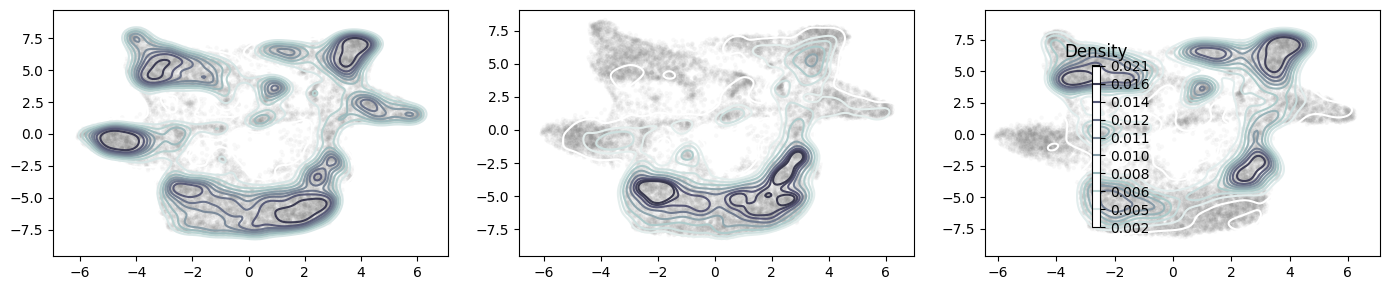

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(14, 3))

# 统一colorbar的cmap
common_cmap = 'bone_r'

kde1 = sns.kdeplot(x=fdata.obsm['spatial'][:, 0][fdata.obs['module11'] > 0],
                   y=fdata.obsm['spatial'][:, 1][fdata.obs['module11'] > 0],
                   ax=ax[0], cmap=common_cmap, alpha=1, bw_adjust=0.5, fill=False)
sns.scatterplot(x=fdata.obsm['spatial'][:, 0],
                y=fdata.obsm['spatial'][:, 1],
                ax=ax[0], color='gray', alpha=0.05, s=10, edgecolor='none')

kde2 = sns.kdeplot(x=fdata.obsm['spatial'][:, 0][fdata.obs['module21'] > 0],
                   y=fdata.obsm['spatial'][:, 1][fdata.obs['module21'] > 0],
                   ax=ax[1], cmap=common_cmap, alpha=1, bw_adjust=0.5, fill=False)
sns.scatterplot(x=fdata.obsm['spatial'][:, 0],
                y=fdata.obsm['spatial'][:, 1],
                ax=ax[1], color='gray', alpha=0.05, s=10, edgecolor='none')

kde3 = sns.kdeplot(x=fdata.obsm['spatial'][:, 0][fdata.obs['module31'] > 0],
                   y=fdata.obsm['spatial'][:, 1][fdata.obs['module31'] > 0],
                   ax=ax[2], cmap=common_cmap, alpha=1, bw_adjust=0.5, fill=False)
sns.scatterplot(x=fdata.obsm['spatial'][:, 0],
                y=fdata.obsm['spatial'][:, 1],
                ax=ax[2], color='gray', alpha=0.05, s=10, edgecolor='none')

# 统一colorbar
cbar = fig.colorbar(kde1.collections[0], ax=ax, orientation='vertical', shrink=0.7)
cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))
cbar.ax.set_title('Density')

plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42
plt.savefig('/home/wpy/stereoseq/20240702-Exclusive/plots/Exclusive_sc_kde.pdf', bbox_inches='tight')
plt.show()

In [ ]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

# 激活pandas2ri转换器
pandas2ri.activate()

# 读取RDS文件
readRDS = robjects.r['readRDS']
Matlas = readRDS('/home/zhaoyp/collaboration/haorui/ref_TILAtlas_mouse_v1.rds')

# 将R对象转换为pandas DataFrame
Matlas_df = pandas2ri.ri2py(Matlas)


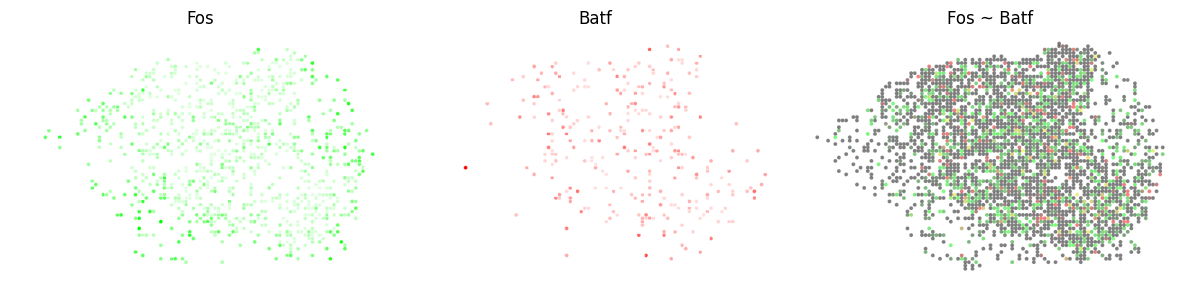

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

_, ax = plt.subplots(1, 3, figsize=(12, 3))
# plot_data = fdata[fdata.obs.marker == 'A']
plot_data = fdata[(fdata.obs.marker == 'A') &
                  (fdata[:, ['Cd8a', 'Cd8b1', 'Cd3e', 'Cd3d', 'Cd3g']].X.toarray().sum(axis=1).flatten() > 0)]

gene_pair = ['Fos', 'Batf']

# 绘制Gzmb和Foxp1的表达
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                s=8, c=plot_data[:, gene_pair[0]].X.toarray().flatten(), cmap=green_cmap, alpha=1, ax=ax[0])
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                s=8, c=plot_data[:, gene_pair[1]].X.toarray().flatten(), cmap=red_cmap, alpha=1, ax=ax[1])

# 找出同时表达的位置并用黄色标记
# 获取两个基因的表达值
gene1_expr = plot_data[:, gene_pair[0]].X.toarray().flatten()
gene2_expr = plot_data[:, gene_pair[1]].X.toarray().flatten()

# 创建颜色数组
colors = np.zeros((len(plot_data), 3))  # RGB数组

# 根据表达值设置颜色
# 绿色分量 - gene1
colors[:, 1] = gene1_expr / gene1_expr.max() * 5 % 1
# 红色分量 - gene2  
colors[:, 0] = gene2_expr / gene2_expr.max() * 5 % 1

# 绘制散点图
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                s=8, c=colors, ax=ax[2], alpha=0.5)

sns.despine(left=True, bottom=True)
ax[0].set_title(f'{gene_pair[0]}')
ax[1].set_title(f'{gene_pair[1]}')
ax[2].set_title(f'{gene_pair[0]} ~ {gene_pair[1]}')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])
plt.tight_layout()

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/Exclusive_Fos_Batf.pdf', bbox_inches='tight')
plt.show()

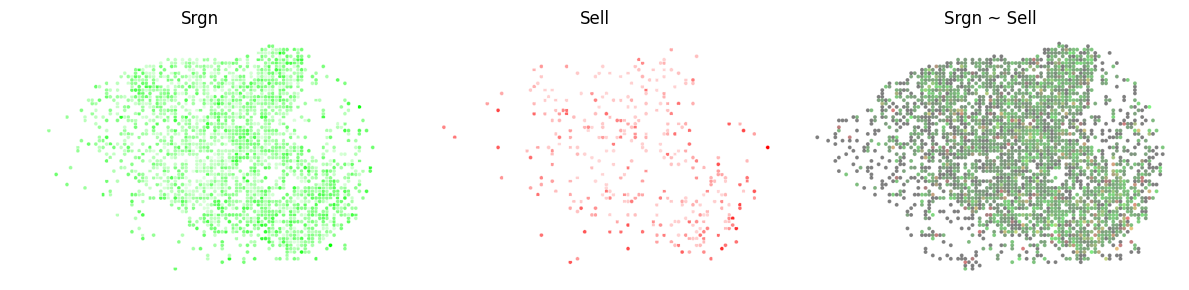

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

_, ax = plt.subplots(1, 3, figsize=(12, 3))
# plot_data = fdata[fdata.obs.marker == 'A']
plot_data = fdata[(fdata.obs.marker == 'A') &
                  (fdata[:, ['Cd8a', 'Cd8b1', 'Cd3e', 'Cd3d', 'Cd3g']].X.toarray().sum(axis=1).flatten() > 0)]

gene_pair = ['Srgn', 'Sell']

# 绘制Gzmb和Foxp1的表达
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                s=8, c=plot_data[:, gene_pair[0]].X.toarray().flatten(), cmap=green_cmap, alpha=1, ax=ax[0])
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                s=8, c=plot_data[:, gene_pair[1]].X.toarray().flatten(), cmap=red_cmap, alpha=1, ax=ax[1])

# 找出同时表达的位置并用黄色标记
# 获取两个基因的表达值
gene1_expr = plot_data[:, gene_pair[0]].X.toarray().flatten()
gene2_expr = plot_data[:, gene_pair[1]].X.toarray().flatten()

# 创建颜色数组
colors = np.zeros((len(plot_data), 3))  # RGB数组

# 根据表达值设置颜色
# 绿色分量 - gene1
colors[:, 1] = gene1_expr / gene1_expr.max() * 1 % 1
# 红色分量 - gene2  
colors[:, 0] = gene2_expr / gene2_expr.max() * 1 % 1

# 绘制散点图
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                s=8, c=colors, ax=ax[2], alpha=0.5)

sns.despine(left=True, bottom=True)
ax[0].set_title(f'{gene_pair[0]}')
ax[1].set_title(f'{gene_pair[1]}')
ax[2].set_title(f'{gene_pair[0]} ~ {gene_pair[1]}')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])
plt.tight_layout()

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/Exclusive_Srgn_Sell.pdf', bbox_inches='tight')
plt.show()

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


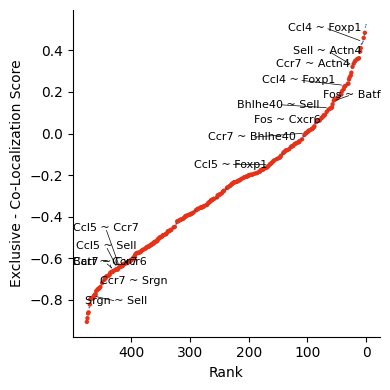

In [3]:
df = pd.read_excel('all_genes_all_4_cancers_Correction_normalized_differ.xlsx', index_col=None)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置图表风格
plt.style.use('seaborn-v0_8-bright')
plt.rcParams['font.size'] = 10

# 创建图表
fig, (ax1) = plt.subplots(1, 1, figsize=(4, 4))

df = df.sort_values(by='Ex-Co', ascending=False)
df['rank'] = range(len(df))

df['sig'] = df['p'] < 1e-10
# df = df[df['Ex-Co'] > 0.72]

# 左侧散点图：基因对的互斥性和显著性
scatter = ax1.scatter(y=df['Ex-Co'], x=df['rank'], 
                     alpha=1, s=df['sig'].map({True: 10, False: 1}),
                     cmap=new_cmap, c=df['sig'], edgecolors='black', linewidths=0)
ax1.set_ylabel('Exclusive - Co-Localization Score')
ax1.set_xlabel('Rank')

# 添加颜色条
# plt.colorbar(scatter, ax=ax1, label='-log10(P-value)')

# 标注前5个最显著的基因对
from adjustText import adjust_text

texts = []
exclusive_genes = ['Ccr7', 'Ccl4', 'Ccl5', 'Cxcr6', 'Foxp1', 'Cxcr3', 'Jun', 'Batf', 'Actn4', 'Fos', 'Srgn', 'Sell', 'Bhlhe40']
for idx, row in df.iterrows():
    if (row['mouse.gene1'] in exclusive_genes and row['mouse.gene1.1'] in exclusive_genes) and (row['rank'] < 200 or row['rank'] > 400):
        texts.append(plt.text(row['rank'], row['Ex-Co'] + 0.006, 
                       f"{row['mouse.gene1']} ~ {row['mouse.gene1.1']}",
                       fontsize=8, ha='left', va='center'))
adjust_text(texts, ax1, expand_text=(1.05, 1.05), expand_points=(1.05, 1.05),
             arrowprops=dict(arrowstyle='-', color='black', linewidth=0.5))

plt.gca().invert_xaxis()
sns.despine()
plt.tight_layout()

# plt.rcParams['pdf.fonttype'] = 42
# plt.savefig('./plots/Ex-Co_plot.pdf', bbox_inches='tight')
plt.show()

In [9]:
df

,mouse.gene.A,mouse.gene.B,mouse.Or,mouse.Pvalue,gene1,gene2,OR,p,rank,sig
0,Ccl5,Sell,0.480142,1.370000e-71,CCL5,SELL,0.213321,0.000000,0,True
1,Ccl5,Ccr7,0.312180,2.310000e-171,CCL5,CCR7,0.249129,0.000000,1,True
2,Ccl4,Ccr7,0.192033,1.280000e-294,CCL4,CCR7,0.286941,0.000000,2,True
3,Gzmb,Ccr7,0.131625,0.000000e+00,GZMB,CCR7,0.322014,0.000000,3,True
4,Ccl4,Ccr7,0.192033,1.280000e-294,CCL4L2,CCR7,0.327923,0.000000,4,True
...,...,...,...,...,...,...,...,...,...,...
470,Tubb4b,Sell,0.754245,4.300000e-13,TUBB4B,SELL,0.967377,0.049860,470,True
471,Dnajb6,Sell,0.626870,7.000000e-35,DNAJB6,SELL,0.969138,0.048186,471,True
472,Gimap4,Jun,0.794995,1.640000e-05,GIMAP4,JUN,0.970262,0.016238,472,True
473,Fos,Anxa5,0.626369,3.480000e-32,FOS,ANXA5,0.972831,0.033337,473,True


/tmp/ipykernel_55899/3641831739.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax1.scatter(y=df['OR'] , x=df['rank'],


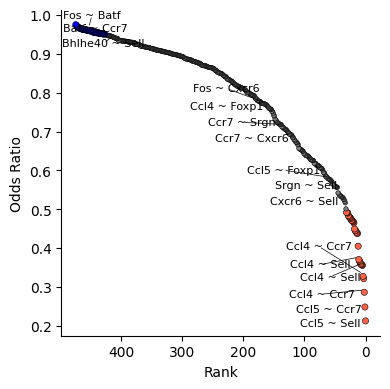

In [19]:
df = pd.read_excel('sig_result_mouse_0.1_1197_genes_human_575_Cd8.xlsx', index_col=None)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置图表风格
plt.style.use('seaborn-v0_8-bright')
plt.rcParams['font.size'] = 10

# 创建图表
fig, (ax1) = plt.subplots(1, 1, figsize=(4, 4))

df = df.sort_values(by='OR', ascending=True)
df['rank'] = range(len(df))

df['sig'] = ['Co-Localization' if df['OR'][i] > 0.95 else ('Exclusive' if df['OR'][i] < 0.5 else 'No significant') for i in range(len(df))]

# 左侧散点图：基因对的互斥性和显著性
scatter = ax1.scatter(y=df['OR'] , x=df['rank'], 
                     alpha=1, s=df['sig'].map({'Exclusive': 20, 'Co-Localization': 20, 'No significant': 10}),
                     cmap=new_cmap, c=df['sig'].map({'Exclusive': 'tomato', 'Co-Localization': 'blue', 'No significant': 'gray'}),
                     edgecolors='black', linewidths=0.4)
ax1.set_ylabel('Odds Ratio')
ax1.set_xlabel('Rank')

# 添加颜色条
# plt.colorbar(scatter, ax=ax1, label='-log10(P-value)')

# 标注前5个最显著的基因对
from adjustText import adjust_text

texts = []
exclusive_genes = ['Ccr7', 'Ccl4', 'Ccl5', 'Cxcr6', 'Foxp1', 'Cxcr3', 'Jun', 'Batf', 'Actn4', 'Fos', 'Srgn', 'Sell', 'Bhlhe40']
for idx, row in df.iterrows():
    if (row['mouse.gene.A'] in exclusive_genes and row['mouse.gene.B'] in exclusive_genes) and (row['rank'] < 200 or row['rank'] > 400):
        texts.append(plt.text(row['rank'], row['OR'] + 0.006, 
                       f"{row['mouse.gene.A']} ~ {row['mouse.gene.B']}",
                       fontsize=8, ha='left', va='center'))
adjust_text(texts, ax1, expand_text=(1.05, 1.05), expand_points=(1.05, 1.05),
             arrowprops=dict(arrowstyle='-', color='black', linewidth=0.5))

plt.gca().invert_xaxis()
sns.despine()
plt.tight_layout()

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/OR_plot.pdf', bbox_inches='tight')
plt.show()

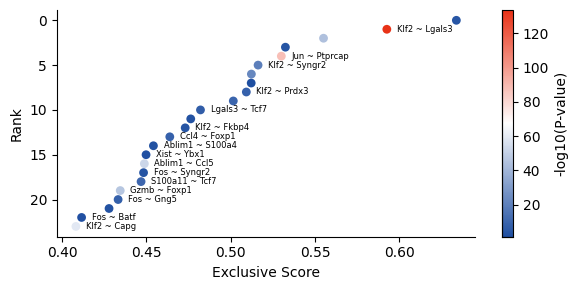

In [10]:
df = pd.read_excel('finalized_exclusive.xlsx', index_col=None)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置图表风格
plt.style.use('seaborn-v0_8-bright')
plt.rcParams['font.size'] = 10

# 创建图表
fig, (ax1) = plt.subplots(1, 1, figsize=(6, 3))

df['rank'] = df.sort_values(by='Exclusive', ascending=False).index
df = df[df['Exclusive'] > 0.4]

# 左侧散点图：基因对的互斥性和显著性
scatter = ax1.scatter(df['Exclusive'], df['rank'], 
                     alpha=1, c=-np.log10(df['p']),
                     cmap=new_cmap, s=40, edgecolors='black', linewidths=0)
ax1.set_xlabel('Exclusive Score')
ax1.set_ylabel('Rank')

# 添加颜色条
plt.colorbar(scatter, ax=ax1, label='-log10(P-value)')

# 标注前5个最显著的基因对
from adjustText import adjust_text

texts = []
exclusive_genes = ['Klf2', 'Jun', 'Tcf7', 'Ccl4', 'Foxp1', 'S100a4', 'Ybx1', 'Ccl5', 'Fos', 'Fos', 'Batf', 'Jund', 'Npm1']
for idx, row in df.iterrows():
    if row['mouse.gene1'] in exclusive_genes or row['mouse.gene1.1'] in exclusive_genes:
        texts.append(plt.text(row['Exclusive'] + 0.006, row['rank'], 
                       f"{row['mouse.gene1']} ~ {row['mouse.gene1.1']}",
                       fontsize=6, ha='left', va='center'))

plt.gca().invert_yaxis()
sns.despine()
plt.tight_layout()

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/Exclusive_plot.pdf', bbox_inches='tight')
plt.show()


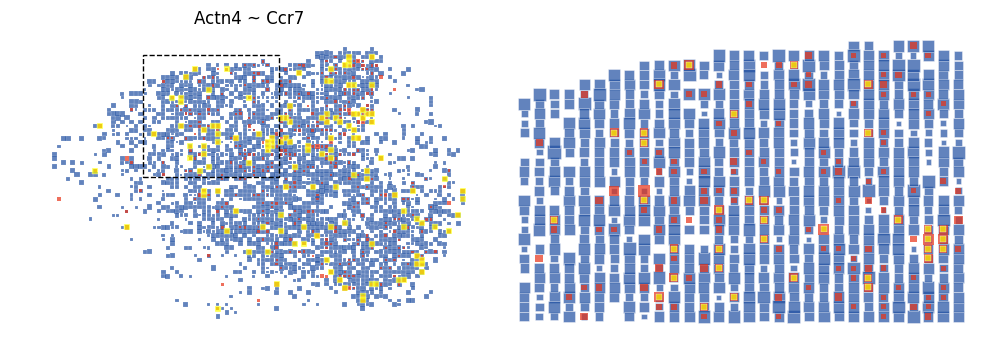

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

_, ax = plt.subplots(1, 2, figsize=(10, 3.5))
# plot_data = fdata[fdata.obs.marker == 'A']
plot_data = fdata[(fdata.obs.marker == 'A') &
                  (fdata[:, ['Cd8a', 'Cd8b1', 'Cd3e', 'Cd3d', 'Cd3g']].X.toarray().sum(axis=1).flatten() > 0)]

gene_pair = ['', 'Ccr7']

# 绘制Gzmb和Foxp1的表达
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                s=plot_data[:, gene_pair[0]].X.toarray().flatten() * 5, color=colors[0], alpha=0.7, marker='s', ax=ax[0])
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                s=plot_data[:, gene_pair[1]].X.toarray().flatten() * 5, color=colors[2], alpha=0.7, marker='s', ax=ax[0])

# 找出同时表达的位置并用黄色标记
coexpress_mask = (plot_data[:, gene_pair[0]].X.toarray().flatten() > 1) & (plot_data[:, gene_pair[1]].X.toarray().flatten() > 1)
coexpress_data = plot_data[coexpress_mask]
sns.scatterplot(x=coexpress_data.obsm['spatial'][:, 0], y=coexpress_data.obsm['spatial'][:, 1],
                s=20, color='yellow', alpha=0.7, marker='s', ax=ax[0])

region = [[4000, 7000], [8000, 11000]]

rect = plt.Rectangle((region[0][0], region[1][0]), 
                    region[0][1] - region[0][0],
                    region[1][1] - region[1][0],
                    fill=False, color='black', linewidth=1, linestyle='--')
ax[0].add_patch(rect)

# 放大区域的绘制
region_data = fdata[(fdata.obs.marker == 'A') &
                    (fdata.obsm['spatial'][:, 0] > region[0][0]) &
                    (fdata.obsm['spatial'][:, 0] < region[0][1]) &
                    (fdata.obsm['spatial'][:, 1] > region[1][0]) &
                    (fdata.obsm['spatial'][:, 1] < region[1][1])]

sns.scatterplot(x=region_data.obsm['spatial'][:, 0], y=region_data.obsm['spatial'][:, 1],
                s=region_data[:, gene_pair[0]].X.toarray().flatten() * 30, color=colors[0], alpha=0.7, marker='s', ax=ax[1])
sns.scatterplot(x=region_data.obsm['spatial'][:, 0], y=region_data.obsm['spatial'][:, 1],
                s=region_data[:, gene_pair[1]].X.toarray().flatten() * 30, color=colors[2], alpha=0.7, marker='s', ax=ax[1])

# 在放大区域中标记共表达位置
region_coexpress_mask = (region_data[:, gene_pair[0]].X.toarray().flatten() > 1) & (region_data[:, gene_pair[1]].X.toarray().flatten() > 1)
region_coexpress_data = region_data[region_coexpress_mask]
sns.scatterplot(x=region_coexpress_data.obsm['spatial'][:, 0], y=region_coexpress_data.obsm['spatial'][:, 1],
                s=20, color='yellow', alpha=0.7, marker='s', ax=ax[1])

sns.despine(left=True, bottom=True)
ax[0].set_title(f'{gene_pair[0]} ~ {gene_pair[1]}')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.tight_layout()

plt.rcParams['pdf.fonttype'] = 42
# plt.savefig('./plots/Exclusive_Ccl4_Foxp1.pdf', bbox_inches='tight')
plt.show()

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


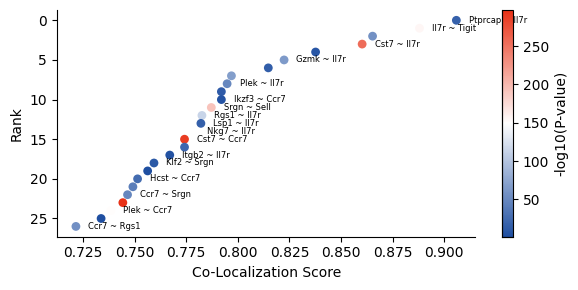

In [106]:
df = pd.read_excel('finalized_co.xlsx', index_col=None)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置图表风格
plt.style.use('seaborn-v0_8-bright')
plt.rcParams['font.size'] = 10

# 创建图表
fig, (ax1) = plt.subplots(1, 1, figsize=(6, 3))

df['rank'] = df.sort_values(by='Co-Localization', ascending=False).index
df = df[df['Co-Localization'] > 0.72]

# 左侧散点图：基因对的互斥性和显著性
scatter = ax1.scatter(df['Co-Localization'], df['rank'], 
                     alpha=1, c=-np.log10(df['p']),
                     cmap=new_cmap, s=40, edgecolors='black', linewidths=0)
ax1.set_xlabel('Co-Localization Score')
ax1.set_ylabel('Rank')

# 添加颜色条
plt.colorbar(scatter, ax=ax1, label='-log10(P-value)')

# 标注前5个最显著的基因对
from adjustText import adjust_text

texts = []
exclusive_genes = ['Ccr7', 'Srgn', 'Klf2', 'Batf', 'Cxcr6', 'Il7r']
for idx, row in df.iterrows():
    if row['mouse.gene1'] in exclusive_genes or row['mouse.gene1.1'] in exclusive_genes:
        texts.append(plt.text(row['Co-Localization'] + 0.006, row['rank'], 
                       f"{row['mouse.gene1']} ~ {row['mouse.gene1.1']}",
                       fontsize=6, ha='left', va='center'))

plt.gca().invert_yaxis()
sns.despine()
plt.tight_layout()

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/Co-Localization_plot.pdf', bbox_inches='tight')
plt.show()


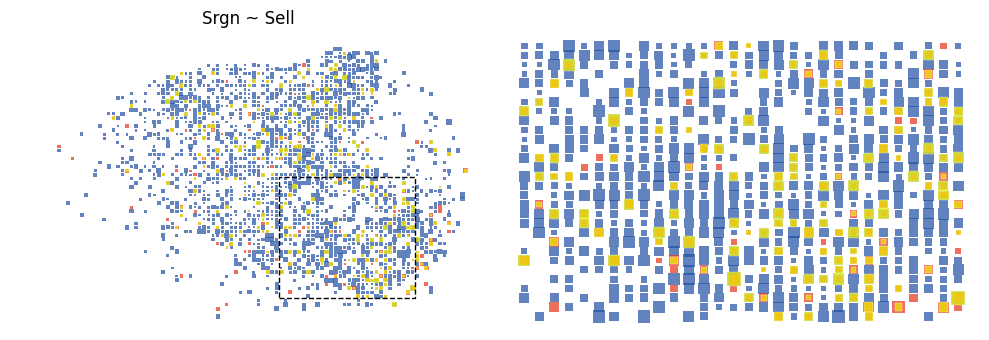

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

_, ax = plt.subplots(1, 2, figsize=(10, 3.5))
plot_data = fdata[(fdata.obs.marker == 'A') &
                  (fdata[:, ['Cd8a', 'Cd8b1', 'Cd3e', 'Cd3d', 'Cd3g']].X.toarray().sum(axis=1).flatten() > 0)]

gene_pair = ['Srgn', 'Sell']

# 计算共表达的位置
coexp_mask = (plot_data[:, gene_pair[0]].X.toarray().flatten() > 0) & (plot_data[:, gene_pair[1]].X.toarray().flatten() > 0)

# 绘制第一个子图
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                s=plot_data[:, gene_pair[0]].X.toarray().flatten() * 5, color=colors[0], alpha=0.7, marker='s', ax=ax[0])
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                s=plot_data[:, gene_pair[1]].X.toarray().flatten() * 5, color=colors[2], alpha=0.7, marker='s', ax=ax[0])
# 添加共表达的点
sns.scatterplot(x=plot_data[coexp_mask].obsm['spatial'][:, 0], y=plot_data[coexp_mask].obsm['spatial'][:, 1],
                s=plot_data[coexp_mask][:, gene_pair[0]].X.toarray().flatten() * 5, color='yellow', alpha=0.7, marker='s', ax=ax[0])

region = [[7000, 10000], [5000, 8000]]

rect = plt.Rectangle((region[0][0], region[1][0]), 
                    region[0][1] - region[0][0],
                    region[1][1] - region[1][0],
                    fill=False, color='black', linewidth=1, linestyle='--')
ax[0].add_patch(rect)

# 绘制第二个子图（放大区域）
region_data = fdata[(fdata.obs.marker == 'A') &
                    (fdata.obsm['spatial'][:, 0] > region[0][0]) &
                    (fdata.obsm['spatial'][:, 0] < region[0][1]) &
                    (fdata.obsm['spatial'][:, 1] > region[1][0]) &
                    (fdata.obsm['spatial'][:, 1] < region[1][1])]

# 计算放大区域的共表达位置
region_coexp_mask = (region_data[:, gene_pair[0]].X.toarray().flatten() > 0) & (region_data[:, gene_pair[1]].X.toarray().flatten() > 0)

sns.scatterplot(x=region_data.obsm['spatial'][:, 0], y=region_data.obsm['spatial'][:, 1],
                s=region_data[:, gene_pair[0]].X.toarray().flatten() * 30, color=colors[0], alpha=0.7, marker='s', ax=ax[1])
sns.scatterplot(x=region_data.obsm['spatial'][:, 0], y=region_data.obsm['spatial'][:, 1],
                s=region_data[:, gene_pair[1]].X.toarray().flatten() * 30, color=colors[2], alpha=0.7, marker='s', ax=ax[1])
# 添加放大区域的共表达点
sns.scatterplot(x=region_data[region_coexp_mask].obsm['spatial'][:, 0], y=region_data[region_coexp_mask].obsm['spatial'][:, 1],
                s=region_data[region_coexp_mask][:, gene_pair[0]].X.toarray().flatten() * 30, color='yellow', alpha=0.7, marker='s', ax=ax[1])

sns.despine(left=True, bottom=True)
ax[0].set_title(f'{gene_pair[0]} ~ {gene_pair[1]}')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.tight_layout()

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('./plots/Exclusive_Srgn_Sell.pdf', bbox_inches='tight')
plt.show()

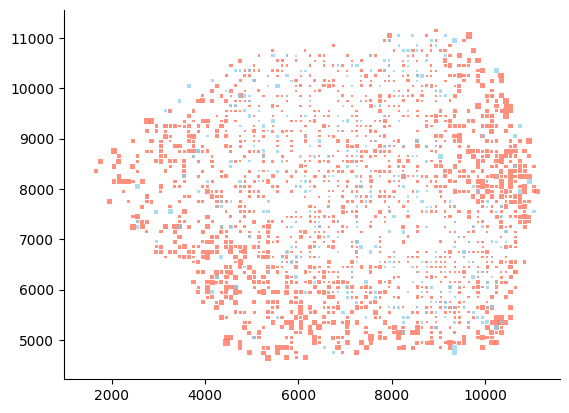

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_data = fdata[fdata.obs.marker == 'A']

sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                s=plot_data[:, 'Fos'].X.toarray().flatten() * 5, color='tomato', alpha=0.7, marker='s')
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                s=plot_data[:, 'Cxcr6'].X.toarray().flatten() * 5, color='skyblue', alpha=0.7, marker='s')
sns.despine()

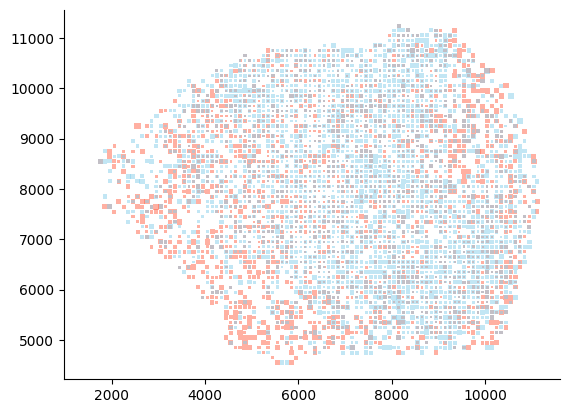

In [18]:
plot_data = fdata[fdata.obs.marker == 'A']

sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                s=plot_data[:, 'Klf2'].X.toarray().flatten() * 5, color='tomato', alpha=0.5, marker='s')
sns.scatterplot(x=plot_data.obsm['spatial'][:, 0], y=plot_data.obsm['spatial'][:, 1],
                s=plot_data[:, 'Srgn'].X.toarray().flatten() * 5, color='skyblue', alpha=0.5, marker='s')
sns.despine()
